# Insurance Claims- Fraud Detection 

Business case:

Fraud is one of the largest and most well-known problems that insurers face. This article focuses on claim data of a car insurance company. Fraudulent claims can be highly expensive for each insurer. Therefore, it is important to know which claims are correct and which are not. It is not doable for insurance companies to check all claims personally since this will cost simply too much time and money. In this article, we will take advantage of the largest asset which insurers have in the fight against fraud: Data. We employ various attributes about the claims, insured people and other circumstances which are included in the data by the insurer. Separating different groups of claims and the corresponding rates of fraud within those groups provide new insights.
Furthermore, we use machine learning to predict which claims are likely to be fraudulent. This information can narrow down the list of claims that need a further check. It enables an insurer to detect more fraudulent claims.

Problem Definition

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims.
Insurance fraud detection is a challenging problem, given the variety of fraud patterns and relatively small ratio of known frauds in typical samples. While building detection models, the savings from loss prevention needs to be balanced with the cost of false alerts. Machine learning techniques allow for improving predictive accuracy, enabling loss control units to achieve higher coverage with low false positive rates.
Insurance frauds cover the range of improper activities which an individual may commit in order to achieve a favourable outcome from the insurance company. This could range from staging the incident, misrepresenting the situation including the relevant actors and the cause of incident and finally the extent of damage caused.

In [1]:
#Importing the necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset has 1000 rows and 40 columns

## Understanding the dataset and EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As we can see from the above table, columns in the dataset consist of a mixture of int64, float64 and object datatype

In [4]:
#Checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Since the column _c39 has no significance, let us proceed in removing that column

In [5]:
df.drop(['_c39'], axis = 1, inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


As expected, the dataset now reduces to 1000 rows and 39 columns

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

It is clear to observe from the above that not all the columns in the dataset can be used for analysis of fraud detection. 

Columns such as policy_number, months_as_customer, insured_zip etc. are only information that do not hold much value. 
Hence, let us proceed in dropping them for a better model.

In [7]:
df=df.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','auto_year','auto_model','insured_hobbies','insured_zip'],axis=1)
df

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,OH,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,?,0,0,?,5070,780,780,3510,Mercedes,Y
2,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,44,IL,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,YES,0,1,?,87200,17440,8720,61040,Honda,N
996,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,YES,2,3,?,108480,18080,18080,72320,Volkswagen,N
997,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,?,2,3,YES,67500,7500,7500,52500,Suburu,N
998,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,?,0,1,YES,46980,5220,5220,36540,Audi,N


The dataset now reduces to 1000 Rows and 31 Columns

In this particular dataset, columns such as police_report_available, collision_type and property damage have a few data points with values ?.

We need to replace them for better prediction. Let us proceed with doing exactly that.

In [8]:
df['police_report_available']=df['police_report_available'].fillna(method='ffill')
df['collision_type']=df['collision_type'].replace({'?':np.nan})
df['collision_type']=df['collision_type'].fillna(method='ffill')
df['property_damage']=df['property_damage'].replace({'?':np.nan})
df['property_damage']=df['property_damage'].fillna(method='ffill')

df

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,OH,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,YES,0,0,?,5070,780,780,3510,Mercedes,Y
2,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,44,IL,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,...,YES,0,1,?,87200,17440,8720,61040,Honda,N
996,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,...,YES,2,3,?,108480,18080,18080,72320,Volkswagen,N
997,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,...,YES,2,3,YES,67500,7500,7500,52500,Suburu,N
998,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,...,YES,0,1,YES,46980,5220,5220,36540,Audi,N


## Visualizations 

Let us now try our best to visualize the dataset and understand the facts

N    753
Y    247
Name: fraud_reported, dtype: int64

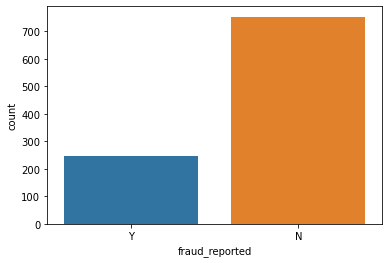

In [9]:
sb.countplot(x=df['fraud_reported'])
df["fraud_reported"].value_counts()

As observed above, it is clear to note that only about 24.7% of claims were fraudulent ones (247 out of 1000 cases).

Lets see how the sexes do in claiming the fraudulent insurance.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

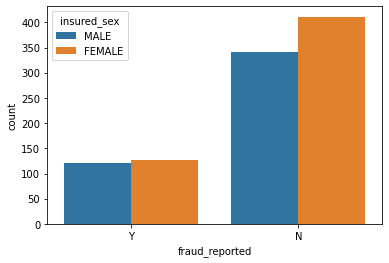

In [10]:
sb.countplot(x=df['fraud_reported'], hue = df['insured_sex'], data = df)

As we can see, the difference in male to female ratio is very marginal in terms of fraudulent claims

Insured occupation vs fraudulent claims

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

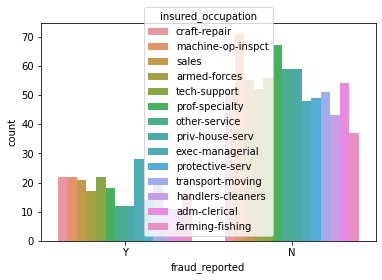

In [11]:
sb.countplot(x=df['fraud_reported'], hue = df['insured_occupation'], data = df)

Since most of the columns contain categorical data, let us proceed with label encoding them for an efficient prediction 

## Label Encoder 

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [13]:
df

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,2,1000,1406.91,0,1,4,2,0,53300,...,1,1,2,2,71610,6510,13020,52080,10,1
1,42,1,2000,1197.22,5000000,1,4,6,2,0,...,1,0,0,0,5070,780,780,3510,8,1
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,...,0,2,3,1,34650,7700,3850,23100,4,0
3,41,0,2000,1415.74,6000000,0,6,1,4,48900,...,0,1,2,1,63400,6340,6340,50720,3,1
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,...,0,0,1,1,6500,1300,650,4550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,1000,1310.80,0,0,5,2,4,0,...,1,0,1,0,87200,17440,8720,61040,6,0
996,41,0,1000,1436.79,0,0,6,9,5,70900,...,1,2,3,0,108480,18080,18080,72320,13,0
997,34,2,500,1383.49,3000000,0,5,1,2,35100,...,1,2,3,2,67500,7500,7500,52500,11,0
998,62,0,2000,1356.92,5000000,1,0,5,5,0,...,1,0,1,2,46980,5220,5220,36540,1,0


In [14]:
#Splitting the dataset for Machine Learning Model
from sklearn.model_selection import train_test_split

Since the target column is categorical, we are employing Classification Models

In [15]:
X = df.drop("fraud_reported", axis = 1)
Y = df["fraud_reported"]

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

## Decision Tree Classifier 

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [19]:
dtc.score(X_train,Y_train)

1.0

In [20]:
print(accuracy_score(Y_test,preddtc))

0.676


In [21]:
print(confusion_matrix(Y_test,preddtc))

[[141  44]
 [ 37  28]]


In [22]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       185
           1       0.39      0.43      0.41        65

    accuracy                           0.68       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.69      0.68      0.68       250



## Random Forest Classifier 

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [24]:
rfc.score(X_train,Y_train)

1.0

In [25]:
print(accuracy_score(Y_test,predrfc))

0.764


In [26]:
print(confusion_matrix(Y_test,predrfc))

[[170  15]
 [ 44  21]]


In [27]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       185
           1       0.58      0.32      0.42        65

    accuracy                           0.76       250
   macro avg       0.69      0.62      0.63       250
weighted avg       0.74      0.76      0.74       250



It is clear to note that Random Forest Classifier is a much better classification model compared to Decision tree classifier in this instance

## Grid Search CV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid_params = {
    'max_depth' : [8,9,10,12,15,20],
    'criterion': ["gini", "entropy"],
    'n_estimators' : [500,700,1000,1200],
    'min_samples_split' : [2,3]
}

In [30]:
GCV = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 12, 15, 20],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 700, 1000, 1200]})

In [31]:
mod = RandomForestClassifier(max_depth = 20, n_estimators = 500, criterion = "gini", min_samples_split = 2)
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)